In [1]:
#美国波士顿地区房价数据描述

#从sklearn.datasets导入波士顿房价数据读取器
from sklearn.datasets import load_boston
#从读取房价数据存储在变量boston中
boston=load_boston()
#输出数据描述
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
#美国波士顿地区房价数据分割

#从sklearn.model_selection导入数据分割器
from sklearn.model_selection import train_test_split

#导入numpy并重命名为np
import numpy as np

X=boston.data
y=boston.target

#随机采样25%的数据构建测试样本，其余作为训练样本
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=33,test_size=0.25)

#分析回归目标值的差异
print("The max target value is",np.max(boston.target))
print("The min target value is",np.min(boston.target))
print("The average target value is",np.mean(boston.target))

The max target value is 50.0
The min target value is 5.0
The average target value is 22.532806324110677


In [3]:
#训练与测试数据标准化处理

#从sklearn.preprocessing导入数据标准化模块
from sklearn.preprocessing import StandardScaler

#分别初始化对特征和目标值的标准化器
ss_X=StandardScaler()
ss_y=StandardScaler()

#分别对训练和测试数据的特征以及目标值进行标准化处理
X_train=ss_X.fit_transform(X_train)
X_test=ss_X.transform(X_test)

In [4]:
#使用线性回归模型SGDRegressor（随机梯度下降线性回归）对美国波士顿地区房价进行预测

#从sklearn.linear_model导入SGDRegressor
from sklearn.linear_model import SGDRegressor
#使用默认配置初始化线性回归器SGDRegressor
sgdr=SGDRegressor()
#使用训练数据进行参数估计
sgdr.fit(X_train,y_train)
#对测试数据进行回归预测
sgdr_y_predict=sgdr.predict(X_test)

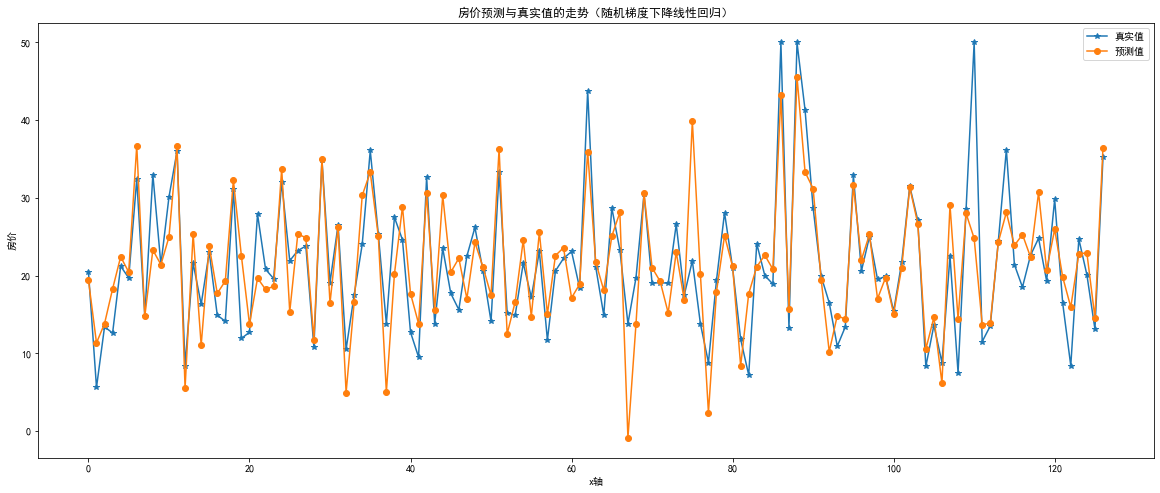

In [12]:
import matplotlib.pyplot as plt
def show_SGDR(y_test,sgdr_y_predict):
    
    '''
    结果展示
    :param y_test: 测试集目标值真实值
    :param sgdr_y_predict: 预测值
    :return:
    '''
    plt.rcParams['font.sans-serif'] = 'SimHei'
    plt.rcParams['axes.unicode_minus'] = False
    
    fig = plt.figure(figsize =(20,8))
    x = np.arange(0,len(sgdr_y_predict))
 
    plt.plot(x,y_test,marker='*')
    plt.plot(x,sgdr_y_predict,marker='o')
    
    plt.title('房价预测与真实值的走势（随机梯度下降线性回归）')
    plt.xlabel('x轴')
    plt.ylabel('房价')
 
    plt.legend(['真实值','预测值'])
    plt.show()
    
show_SGDR(y_test,sgdr_y_predict)

In [27]:
#径向基核函数配置的支持向量机回归

#从sklearn.svm中导入支持向量机（回归）模型
from sklearn.svm import SVR

#使用径向基核函数配置的支持向量机进行回归训练，并且对测试样本进行预测
rbf_svr=SVR(kernel='rbf')
rbf_svr.fit(X_train,y_train)
rbf_svr_y_predict=rbf_svr.predict(X_test)

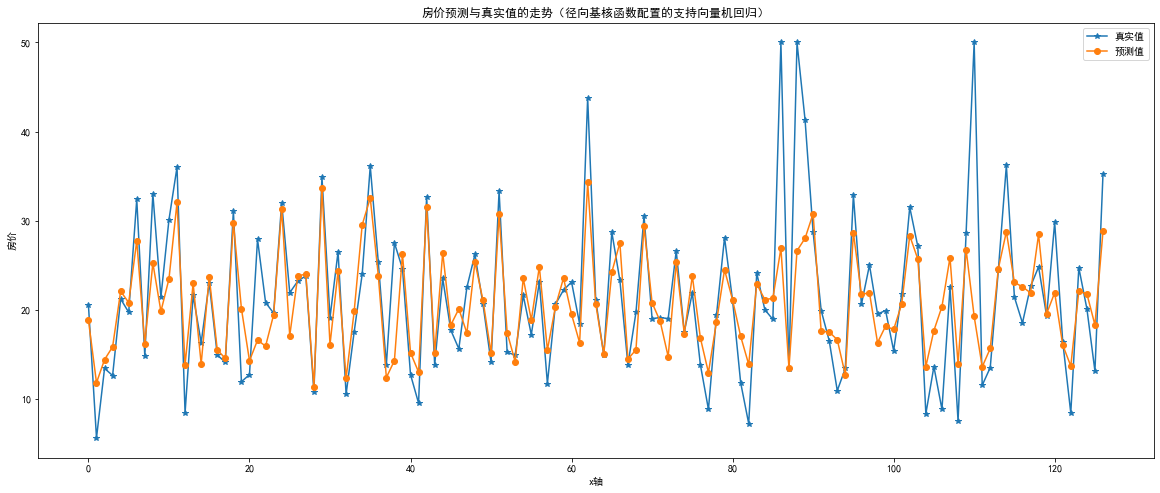

In [28]:
def show_SVR(y_test,rbf_svr_y_predict):

    plt.rcParams['font.sans-serif'] = 'SimHei'
    plt.rcParams['axes.unicode_minus'] = False
    
    fig = plt.figure(figsize =(20,8))
    x = np.arange(0,len(rbf_svr_y_predict))
 
    plt.plot(x,y_test,marker='*')
    plt.plot(x,rbf_svr_y_predict,marker='o')
    
    plt.title('房价预测与真实值的走势（径向基核函数配置的支持向量机回归）')
    plt.xlabel('x轴')
    plt.ylabel('房价')
 
    plt.legend(['真实值','预测值'])
    plt.show()
    
show_SVR(y_test,rbf_svr_y_predict)

In [29]:
#使用据距离加权回归的K近邻回归模型对美国波士顿房价数据进行回归预测

# 从sklearn.neighbors导入KNeighborRegressor(K近邻回归器)
from sklearn.neighbors import KNeighborsRegressor

# 初试化K近邻回归器,并且调整配置,使得预测的方式为根据距离加权回归:weights='distance'
dis_knr = KNeighborsRegressor(weights='distance')
dis_knr.fit(X_train, y_train)
dis_knr_y_predict = dis_knr.predict(X_test)

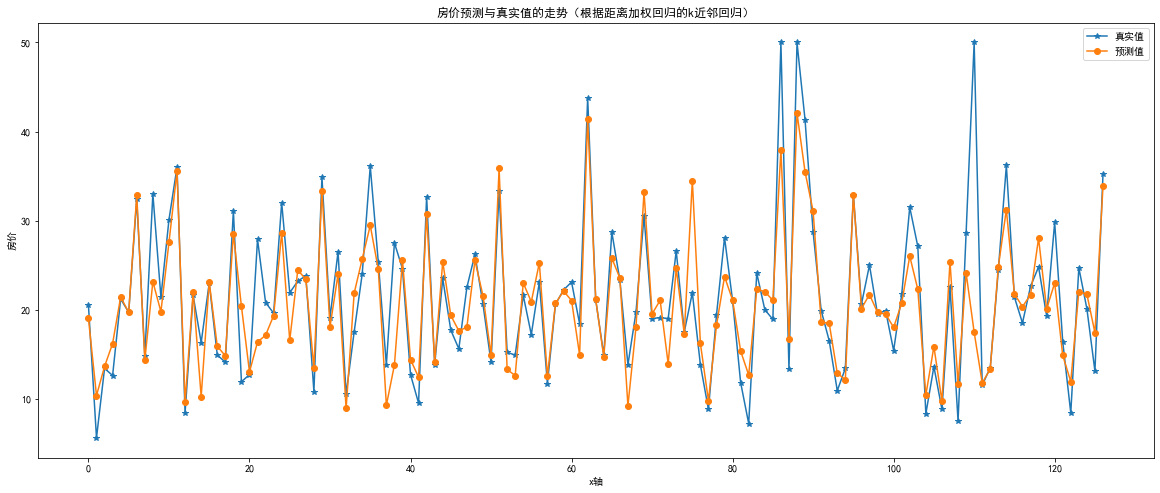

In [30]:
def show_knr(y_test,dis_knr_y_predict):
    
    plt.rcParams['font.sans-serif'] = 'SimHei'
    plt.rcParams['axes.unicode_minus'] = False
    
    fig = plt.figure(figsize =(20,8))
    x = np.arange(0,len(dis_knr_y_predict))
 
    plt.plot(x,y_test,marker='*')
    plt.plot(x,dis_knr_y_predict,marker='o')
    
    plt.title('房价预测与真实值的走势（根据距离加权回归的k近邻回归）')
    plt.xlabel('x轴')
    plt.ylabel('房价')
 
    plt.legend(['真实值','预测值'])
    plt.show()
    
show_knr(y_test,dis_knr_y_predict)

In [31]:
#使用回归树对美国波士顿房价训练数据进行学习，并对测试数据进行预测

#从sklearn.tree中导入DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
#使用默认配置初始化DecisionTreeRegressor
dtr=DecisionTreeRegressor()
#用波士顿房价的训练数据构建回归树
dtr.fit(X_train,y_train)
#使用默认配置的单一回归树对测试数据进行预测，并将预测值存储在变量dtr_y_predict中
dtr_y_predict=dtr.predict(X_test)

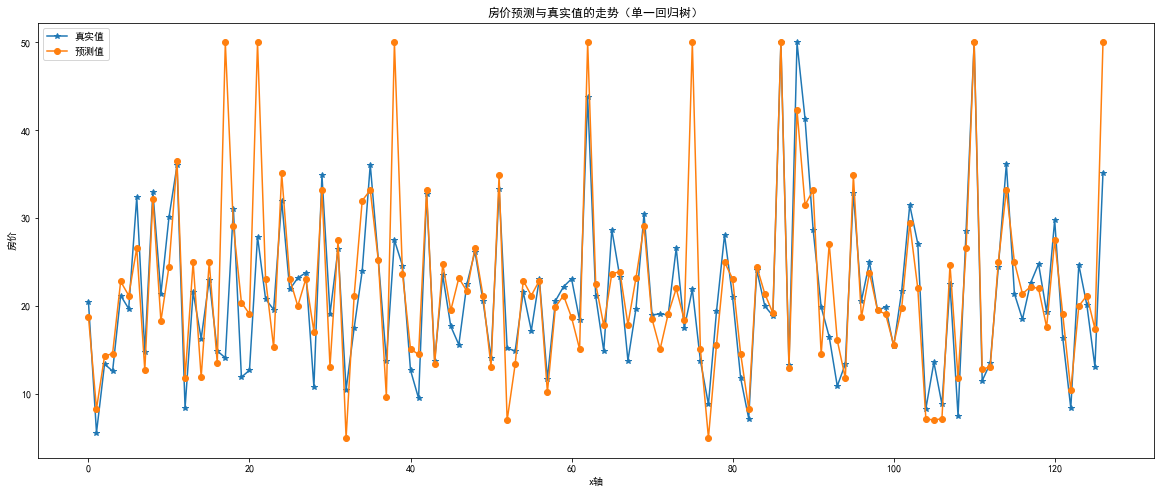

In [32]:
def show_dtr(y_test,dtr_y_predict):

    plt.rcParams['font.sans-serif'] = 'SimHei'
    plt.rcParams['axes.unicode_minus'] = False
    
    fig = plt.figure(figsize =(20,8))
    x = np.arange(0,len(dtr_y_predict))
 
    plt.plot(x,y_test,marker='*')
    plt.plot(x,dtr_y_predict,marker='o')
    
    plt.title('房价预测与真实值的走势（单一回归树）')
    plt.xlabel('x轴')
    plt.ylabel('房价')
 
    plt.legend(['真实值','预测值'])
    plt.show()
    
show_dtr(y_test,dtr_y_predict)

In [33]:
#pca降维处理

from sklearn.decomposition import PCA
#对数据进行标准化处理
X_std=StandardScaler().fit_transform(X)
#实例化PCA
pca = PCA(n_components = 3)
#训练数据
pca.fit(X_std)
#使用PCA的属性查看特征值
pca.singular_values_

array([55.6793095 , 26.93022859, 25.07516773])

In [34]:
#使用PCA的属性查看特征值对应的特征向量
pca.components_

array([[ 0.2509514 , -0.25631454,  0.34667207,  0.00504243,  0.34285231,
        -0.18924257,  0.3136706 , -0.32154387,  0.31979277,  0.33846915,
         0.20494226, -0.20297261,  0.30975984],
       [-0.31525237, -0.3233129 ,  0.11249291,  0.45482914,  0.21911553,
         0.14933154,  0.31197778, -0.34907   , -0.27152094, -0.23945365,
        -0.30589695,  0.23855944, -0.07432203],
       [ 0.24656649,  0.29585782, -0.01594592,  0.28978082,  0.12096411,
         0.59396117, -0.01767481, -0.04973627,  0.28725483,  0.22074447,
        -0.32344627, -0.3001459 , -0.26700025]])

In [35]:
#对原始的数据集进行转换
new_X = X.dot(pca.components_.T)
new_X

array([[ 38.89018107,  32.93532391, -51.87396066],
       [ 33.02343232,  54.79866941, -71.20799688],
       [ 26.53873512,  48.76840918, -67.85363879],
       ...,
       [ 49.08729488,  52.32240905, -64.55434463],
       [ 49.49001494,  50.78673003, -63.82014701],
       [ 46.64886906,  48.71888423, -65.55410705]])

In [36]:
#随机采样25%的数据构建测试样本，其余作为训练样本
X_train,X_test,y_train,y_test=train_test_split(new_X,y,random_state=33,test_size=0.25)
#分析回归目标值的差异
print("The max target value is",np.max(boston.target))
print("The min target value is",np.min(boston.target))
print("The average target value is",np.mean(boston.target))

The max target value is 50.0
The min target value is 5.0
The average target value is 22.532806324110677


In [37]:
#训练与测试数据标准化处理

#从sklearn.preprocessing导入数据标准化模块
from sklearn.preprocessing import StandardScaler

#分别初始化对特征和目标值的标准化器
ss_X=StandardScaler()
ss_y=StandardScaler()

#分别对训练和测试数据的特征以及目标值进行标准化处理
X_train=ss_X.fit_transform(X_train)
X_test=ss_X.transform(X_test)

In [38]:
#使用线性回归模型SGDRegressor（随机梯度下降线性回归）对美国波士顿地区房价进行预测

#从sklearn.linear_model导入SGDRegressor
from sklearn.linear_model import SGDRegressor
#使用默认配置初始化线性回归器SGDRegressor
sgdr=SGDRegressor()
#使用训练数据进行参数估计
sgdr.fit(X_train,y_train)
#对测试数据进行回归预测
sgdr_y_predict=sgdr.predict(X_test)

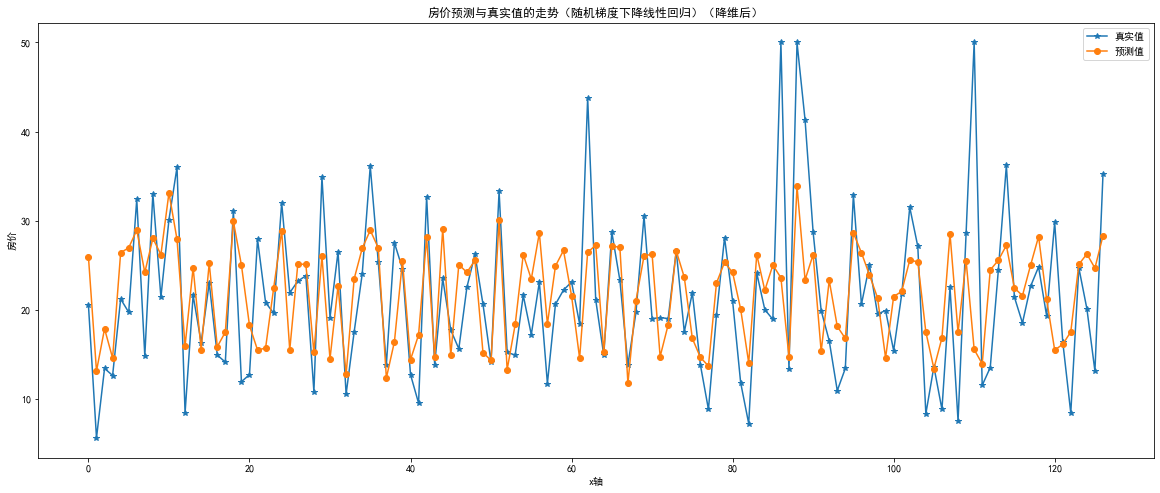

In [39]:
import matplotlib.pyplot as plt
def show_SGDR(y_test,sgdr_y_predict):
    
    '''
    结果展示
    :param y_test: 测试集目标值真实值
    :param sgdr_y_predict: 预测值
    :return:
    '''
    plt.rcParams['font.sans-serif'] = 'SimHei'
    plt.rcParams['axes.unicode_minus'] = False
    
    fig = plt.figure(figsize =(20,8))
    x = np.arange(0,len(sgdr_y_predict))
 
    plt.plot(x,y_test,marker='*')
    plt.plot(x,sgdr_y_predict,marker='o')
    
    plt.title('房价预测与真实值的走势（随机梯度下降线性回归）（降维后）')
    plt.xlabel('x轴')
    plt.ylabel('房价')
 
    plt.legend(['真实值','预测值'])
    plt.show()
    
show_SGDR(y_test,sgdr_y_predict)

In [40]:
#径向基核函数配置的支持向量机回归

#从sklearn.svm中导入支持向量机（回归）模型
from sklearn.svm import SVR

#使用径向基核函数配置的支持向量机进行回归训练，并且对测试样本进行预测
rbf_svr=SVR(kernel='rbf')
rbf_svr.fit(X_train,y_train)
rbf_svr_y_predict=rbf_svr.predict(X_test)

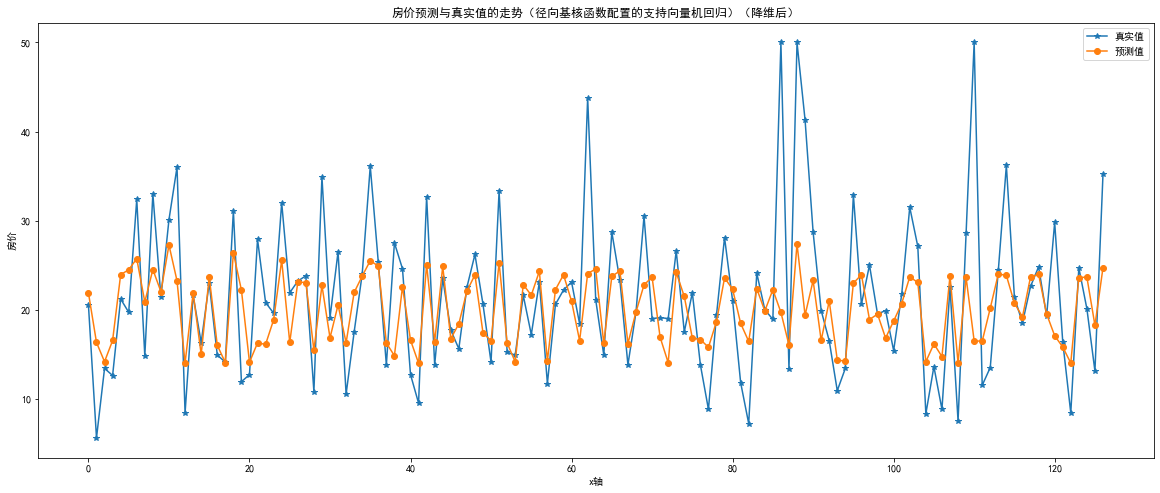

In [41]:
def show_SVR(y_test,rbf_svr_y_predict):

    plt.rcParams['font.sans-serif'] = 'SimHei'
    plt.rcParams['axes.unicode_minus'] = False
    
    fig = plt.figure(figsize =(20,8))
    x = np.arange(0,len(rbf_svr_y_predict))
 
    plt.plot(x,y_test,marker='*')
    plt.plot(x,rbf_svr_y_predict,marker='o')
    
    plt.title('房价预测与真实值的走势（径向基核函数配置的支持向量机回归）（降维后）')
    plt.xlabel('x轴')
    plt.ylabel('房价')
 
    plt.legend(['真实值','预测值'])
    plt.show()
    
show_SVR(y_test,rbf_svr_y_predict)

In [42]:
#使用据距离加权回归的K近邻回归模型对美国波士顿房价数据进行回归预测

# 从sklearn.neighbors导入KNeighborRegressor(K近邻回归器)
from sklearn.neighbors import KNeighborsRegressor

# 初试化K近邻回归器,并且调整配置,使得预测的方式为根据距离加权回归:weights='distance'
dis_knr = KNeighborsRegressor(weights='distance')
dis_knr.fit(X_train, y_train)
dis_knr_y_predict = dis_knr.predict(X_test)

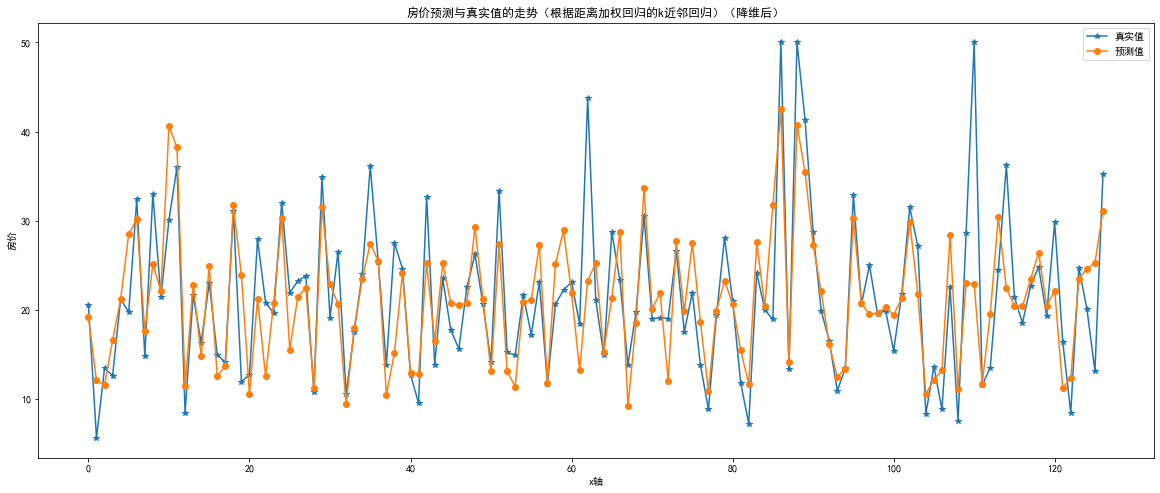

In [43]:
def show_knr(y_test,dis_knr_y_predict):
    
    plt.rcParams['font.sans-serif'] = 'SimHei'
    plt.rcParams['axes.unicode_minus'] = False
    
    fig = plt.figure(figsize =(20,8))
    x = np.arange(0,len(dis_knr_y_predict))
 
    plt.plot(x,y_test,marker='*')
    plt.plot(x,dis_knr_y_predict,marker='o')
    
    plt.title('房价预测与真实值的走势（根据距离加权回归的k近邻回归）（降维后）')
    plt.xlabel('x轴')
    plt.ylabel('房价')
 
    plt.legend(['真实值','预测值'])
    plt.show()
    
show_knr(y_test,dis_knr_y_predict)

In [44]:
#使用回归树对美国波士顿房价训练数据进行学习，并对测试数据进行预测

#从sklearn.tree中导入DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
#使用默认配置初始化DecisionTreeRegressor
dtr=DecisionTreeRegressor()
#用波士顿房价的训练数据构建回归树
dtr.fit(X_train,y_train)
#使用默认配置的单一回归树对测试数据进行预测，并将预测值存储在变量dtr_y_predict中
dtr_y_predict=dtr.predict(X_test)

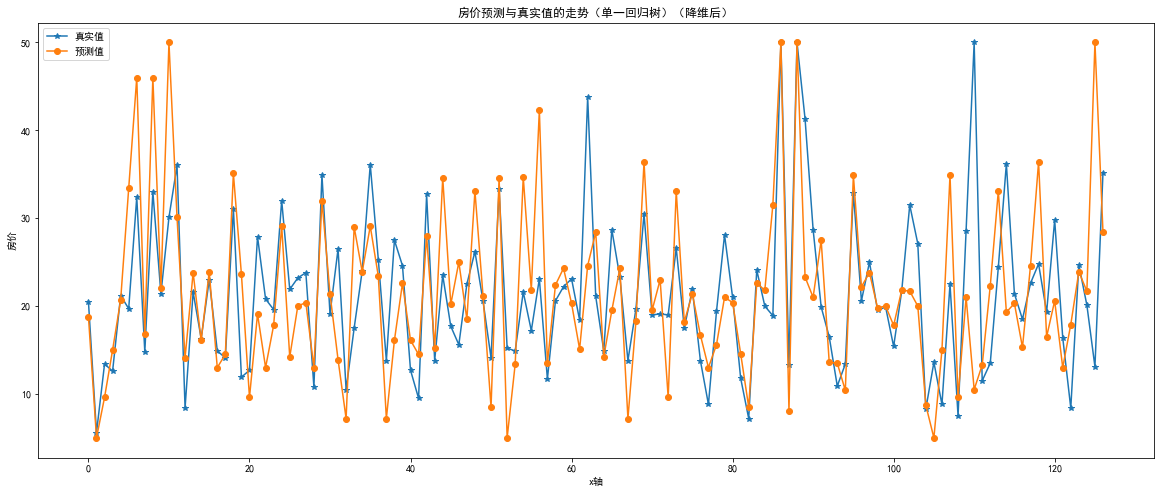

In [45]:
def show_dtr(y_test,dtr_y_predict):

    plt.rcParams['font.sans-serif'] = 'SimHei'
    plt.rcParams['axes.unicode_minus'] = False
    
    fig = plt.figure(figsize =(20,8))
    x = np.arange(0,len(dtr_y_predict))
 
    plt.plot(x,y_test,marker='*')
    plt.plot(x,dtr_y_predict,marker='o')
    
    plt.title('房价预测与真实值的走势（单一回归树）（降维后）')
    plt.xlabel('x轴')
    plt.ylabel('房价')
 
    plt.legend(['真实值','预测值'])
    plt.show()
    
show_dtr(y_test,dtr_y_predict)